# Student Performance Analysis - EDA + Predicting Student Notes

In this analysis we will be doing an EDA analysis of a class of students and their performance in the exams. After making sure the data is complete and clean, we will use the data to train a regression model that will allow us to predict the outcome of the next exam term results. 

## Library Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Import

In [2]:
df = pd.read_csv(r'C:\Users\Gonzalo\Documents\DH\Contenido\ds_blend_students_2020\Proyectos Propios\Prediction Models\02. Regression Projects\Student Performance\Data\StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Data Overview

Let's take a look at the database values briefly, and then we will go in depth.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


It seems we have 5 object classes, and 3 numerical classes, and no null values. Great! 

Let's see if we find something odd when looking at the numerical values:

In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Everything seems to be normal, no visible outliers. Note that people can get a 0 in maths, but not in reading and writing, and the values for maths are the lowest of all 3 scores. 

Let's check the categorical values now:

In [5]:
df.describe(include='O')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


Great! Some extra information:
- The **genders** are divided into 2: Male and Female, with more female observations than male. 
- **Race** is divided into 5 groups and group C seems to be the commonest by a decent margin
- The **parental level of education** is divided into 6 groups
- **Lunch** determines if the lunch of the student is either standard or is free/reduced (maybe it has to do with economic situation of the student or a scolarship due to merits?). Most people have to pay a standard fee for their lunch. 
- **Test preparation course** is 'completed' if it was done by the student, and 'none' if it wasn't. Most people haven't done it.

## EDA

Our EDA analysis will cover the following:
1. Distribution of Categorical Variables: How are the values distributed?
2. Distribution of Numerical Features
3. Grouping/Pivot table Analysis of Numerical Variables vs Categorical Features
4. Grouping and plotting Features
5. Score column engineering for analysis
6. EDA with new Features

Let's begin!

### 1. Distribution of Categorical Variables

In this section we will see how the categorical variables, and we will be able to confirm our hypothesis created while observing the df.describe chart.

#### Genders

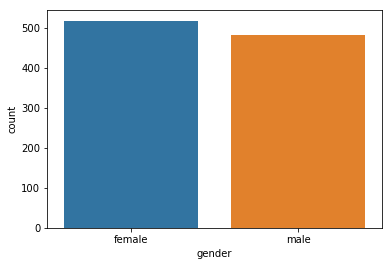

In [6]:
sns.countplot(df['gender'])

#### Ethnicity

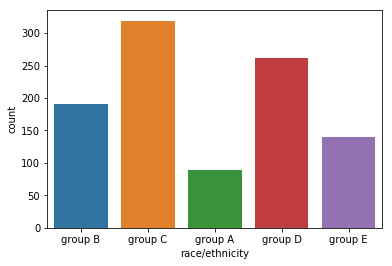

In [7]:
sns.countplot(df['race/ethnicity'])

#### Parental Level of Education

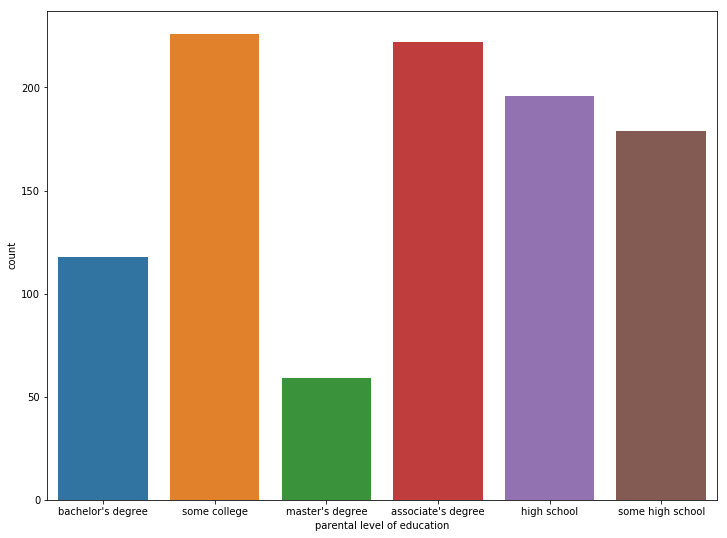

In [8]:
plt.figure(figsize=[12,9])
sns.countplot(df['parental level of education'])

#### Lunch

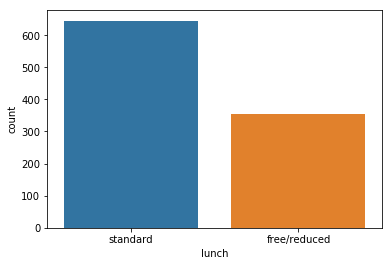

In [9]:
sns.countplot(df['lunch'])

#### Test Prep Course

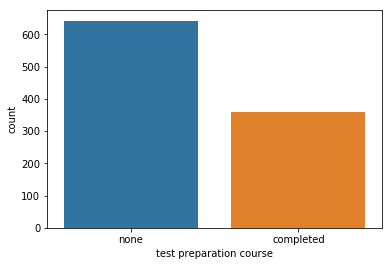

In [10]:
sns.countplot(df['test preparation course'])

Let's review our early assumptions:
- The **genders** are divided into 2: Male and Female, with more female observations than male. **CORRECT!**
- **Race** is divided into 5 groups and group C seems to be the commonest by a decent margin.**Partially correct, group D is pretty close in numbers.**
- The **parental level of education** is divided into 6 groups. 
- **Lunch** determines if the lunch of the student is either standard or is free/reduced (maybe it has to do with economic situation of the student or a scolarship due to merits?). Most people have to pay a standard fee for their lunch. **CORRECT!**
- **Test preparation course** is 'completed' if it was done by the student, and 'none' if it wasn't. Most people haven't done it. **CORRECT!**

### 2. Distribution of Numerical Features

In this section we will look further into what is the distribution of the numerical features like.

#### Maths, Reading, Writing Scores - Distribution

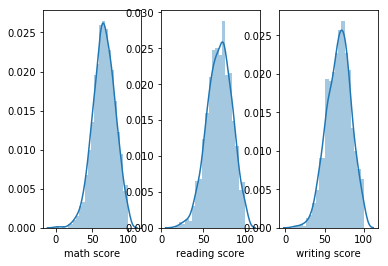

In [11]:
plt.subplot(1, 3, 1)
sns.distplot(df['math score'])

plt.subplot(1, 3, 2)
sns.distplot(df['reading score'])

plt.subplot(1, 3, 3)
sns.distplot(df['writing score'])

The distribution of the 3 scores seems to be really similar to a normal with almost no skewness.

#### Maths, Reading, Writing Scores - Scores Visualization

**Maths**

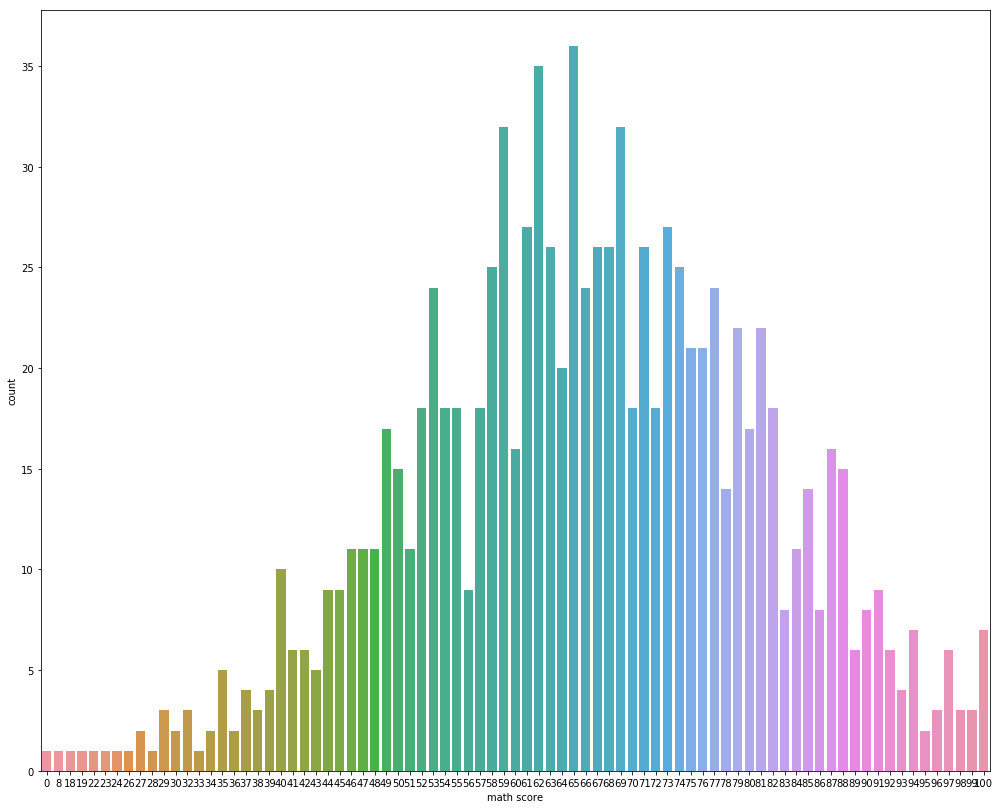

In [12]:
plt.figure(figsize=[17,14])
sns.countplot(df['math score'])

**Reading**

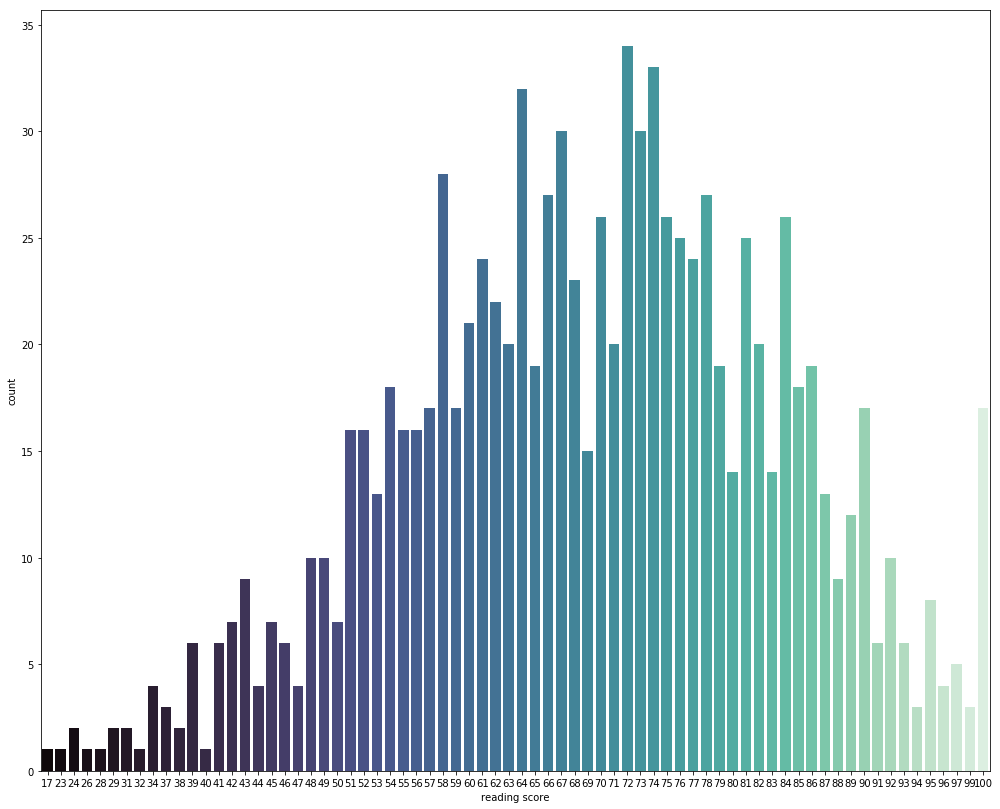

In [13]:
rmean = df['reading score'].mean()
plt.figure(figsize=[17,14])
sns.countplot(df['reading score'],palette='mako')

**Writing**

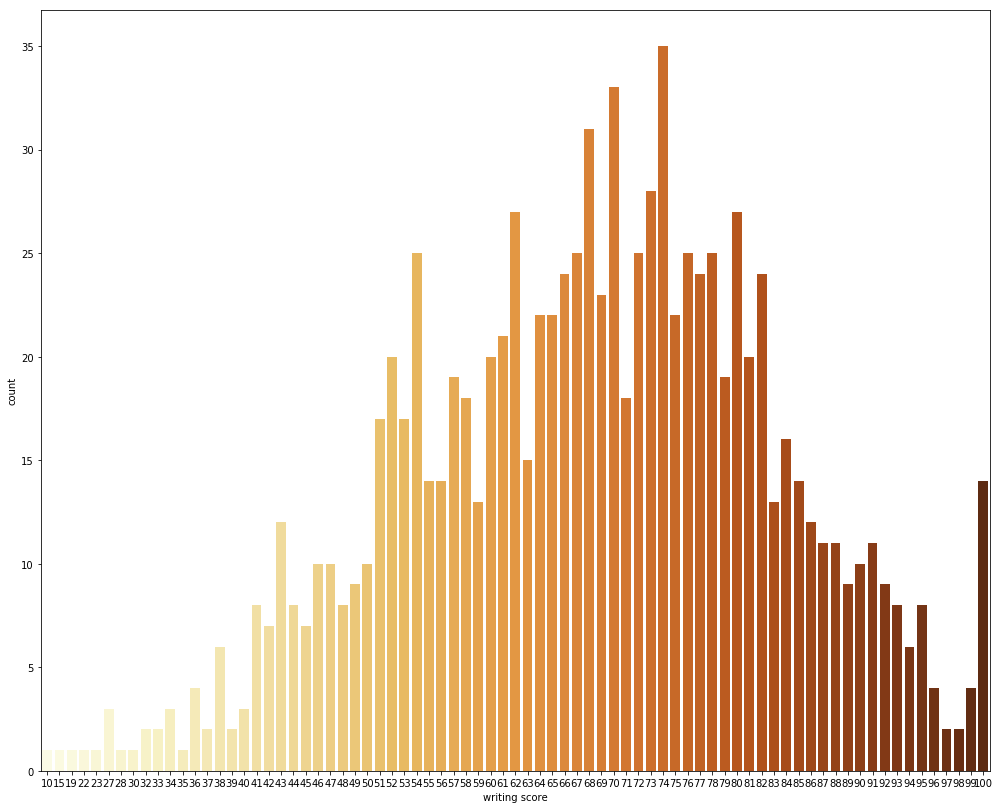

In [14]:
plt.figure(figsize=[17,14])
sns.countplot(df['writing score'],palette="YlOrBr")

### 3. Grouping/Pivot table Analysis of Numerical Variables vs Categorical Features

Now let's start with the interesting EDA - Data Crossing

#### Grouping by Gender - Comparing Scores

In [15]:
df[['gender','math score','reading score','writing score']].groupby('gender').mean().round(2)

,math score,reading score,writing score
gender,,,
female,63.63,72.61,72.47
male,68.73,65.47,63.31


It seems that the females scored better than the males in reading and writing, but not in math, interesting!

#### Grouping by Ethnicity - Comparing Scores

In [16]:
df[['race/ethnicity','math score','reading score','writing score']].groupby('race/ethnicity').mean().round(2)

,math score,reading score,writing score
race/ethnicity,,,
group A,61.63,64.67,62.67
group B,63.45,67.35,65.60
group C,64.46,69.10,67.83
group D,67.36,70.03,70.15
group E,73.82,73.03,71.41


There definitely seems to be a correlation between the race/ethnicity of the individual and their scores. Group E scored better than any other group in the 3 tests, and each group scored better in average than the one that follows. 

#### Grouping by Parental Level of Education - Comparing Scores

In [17]:
df[['parental level of education','math score','reading score','writing score']].groupby('parental level of education').mean().round(2).sort_values(by='math score')

,math score,reading score,writing score
parental level of education,,,
high school,62.14,64.70,62.45
some high school,63.50,66.94,64.89
some college,67.13,69.46,68.84
associate's degree,67.88,70.93,69.90
bachelor's degree,69.39,73.00,73.38
master's degree,69.75,75.37,75.68


There does seem to be a positive correlation between the parental education and the scores achieved by the students as well! Impressive!

#### Grouping by Lunch - Comparing Scores

In [18]:
df[['lunch','math score','reading score','writing score']].groupby('lunch').mean().round(2).sort_values(by='math score')

,math score,reading score,writing score
lunch,,,
free/reduced,58.92,64.65,63.02
standard,70.03,71.65,70.82


Having free/reduced and standard lunch does seem to correlate with the overall score of the student. I will be leaning towards the hypothesis that the students that have less financial resources have access to reduced values on meals, not the students with a scholarship. 

#### Grouping by Test Preparation Course Completion - Does it actually help?

In [19]:
df[['test preparation course','math score','reading score','writing score']].groupby('test preparation course').mean().round(2).sort_values(by='math score')

,math score,reading score,writing score
test preparation course,,,
none,64.08,66.53,64.50
completed,69.70,73.89,74.42


The course seems to be quite useful. The students that did the course seem to average at least 5 points more than the students that did not take the test preparation course. I'd sign up for that! 

### 4. Grouping and plotting Features

Let's plot the non target features against each other to see if we can find any insights.

#### Parental Level of Education vs Test Preparation Course

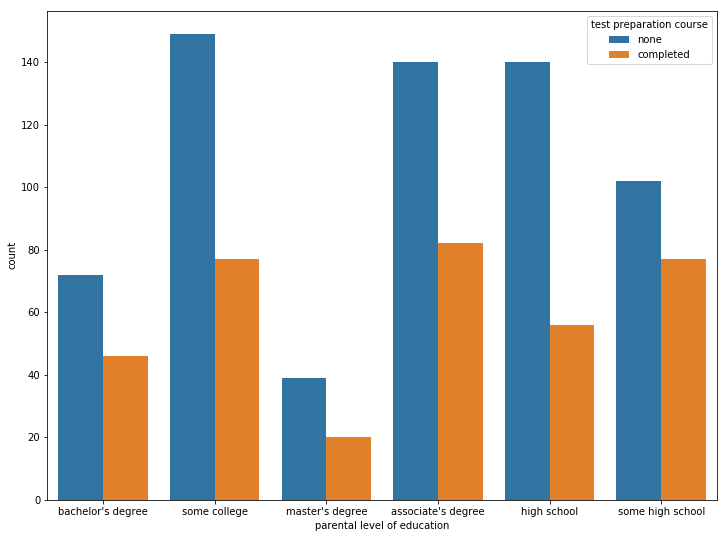

In [20]:
plt.figure(figsize= [12,9])
sns.countplot(x='parental level of education',hue='test preparation course',data=df)

It seems that the more educated the individual parents, the less likely it is that the students take the test preparation course.

#### Parental Level of Education vs Race/Ethnicity 

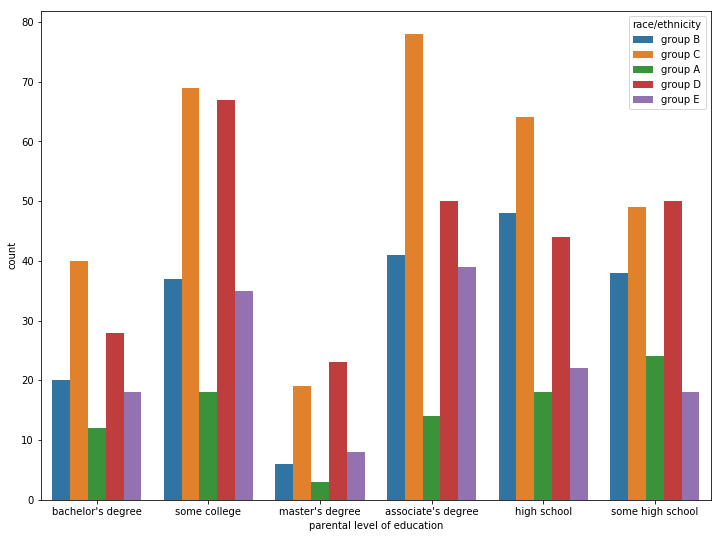

In [21]:
plt.figure(figsize= [12,9])
sns.countplot(x='parental level of education',hue='race/ethnicity',data=df)

### 5. Score Column Feature Engineering 

Let's create some new features to improve the accuracy of our analysis. The following variables will be created:
- Overall Score: The score that we will predict with this analysis. Composed by the sum of math, reading and writing scores 
- Math Pass: If the student thinks they will pass the maths test
- Reading Pass: If the student thinks they will pass the reading test
- Writing Pass: If the student thinks they will pass the writing test
- Overall pass: If the student thinks they will pass the exam overall

#### Overall Score

In [22]:
df['overall score'] = df['writing score'] + df['reading score'] + df['math score']

In [23]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


#### Defining Pass

In [24]:
# Define a passing score
pass_score = 50

def exampass(score):
    if score > pass_score:
        return 1
    return 0

#### Math Pass

In [25]:
df['math pass'] = df.apply(lambda x : exampass(x['math score']), axis=1)

In [26]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall score,math pass
0,female,group B,bachelor's degree,standard,none,72,72,74,218,1
1,female,group C,some college,standard,completed,69,90,88,247,1
2,female,group B,master's degree,standard,none,90,95,93,278,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,0
4,male,group C,some college,standard,none,76,78,75,229,1


#### Reading Pass

In [27]:
df['reading pass'] = df.apply(lambda x : exampass(x['reading score']), axis=1)

In [28]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall score,math pass,reading pass
0,female,group B,bachelor's degree,standard,none,72,72,74,218,1,1
1,female,group C,some college,standard,completed,69,90,88,247,1,1
2,female,group B,master's degree,standard,none,90,95,93,278,1,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,0,1
4,male,group C,some college,standard,none,76,78,75,229,1,1


#### Writing Pass

In [29]:
df['writing pass'] = df.apply(lambda x : exampass(x['writing score']), axis=1)

In [30]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall score,math pass,reading pass,writing pass
0,female,group B,bachelor's degree,standard,none,72,72,74,218,1,1,1
1,female,group C,some college,standard,completed,69,90,88,247,1,1,1
2,female,group B,master's degree,standard,none,90,95,93,278,1,1,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,0,1,0
4,male,group C,some college,standard,none,76,78,75,229,1,1,1


#### Overall Pass

To pass the exam, the student has to pass all three individual exams. 

In [31]:
df['overall pass'] = df.apply(lambda x : 1 if np.all([x['math pass'] == 1, x['reading pass'] == 1, x['writing pass'] == 1]) else 0, axis=1)

In [32]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall score,math pass,reading pass,writing pass,overall pass
0,female,group B,bachelor's degree,standard,none,72,72,74,218,1,1,1,1
1,female,group C,some college,standard,completed,69,90,88,247,1,1,1,1
2,female,group B,master's degree,standard,none,90,95,93,278,1,1,1,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,0,1,0,0
4,male,group C,some college,standard,none,76,78,75,229,1,1,1,1


### 6. EDA with New Features 

Let's see how the students performed on each exam during the terms used for this analysis

#### Math Passes

In [33]:
df['math pass'].value_counts()

1    850
0    150
Name: math pass, dtype: int64

([<matplotlib.patches.Wedge at 0x198beaaf808>,
 [Text(-0.980107,0.499389,'Pass'), Text(0.980107,-0.499389,'Fail')])

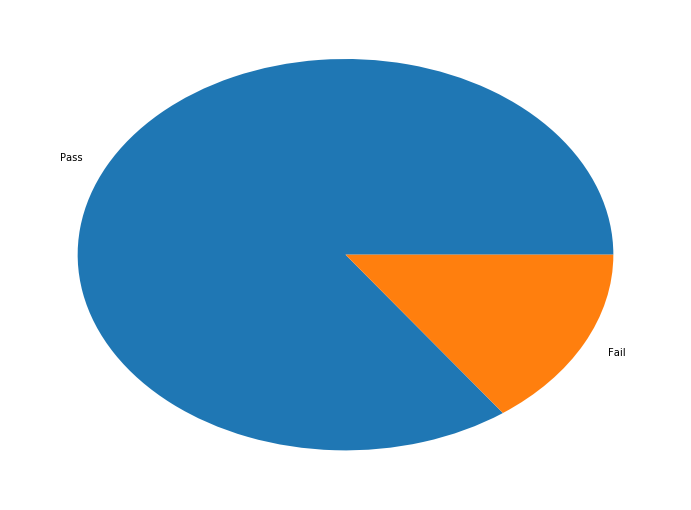

In [34]:
plt.figure(figsize=[12,9])
plt.pie(x= df['math pass'].value_counts(), labels = ['Pass','Fail'])

#### Reading Passes

In [35]:
df['reading pass'].value_counts()

1    903
0     97
Name: reading pass, dtype: int64

([<matplotlib.patches.Wedge at 0x198bec4ad08>,
 [Text(-1.04932,0.330044,'Pass'), Text(1.04932,-0.330044,'Fail')])

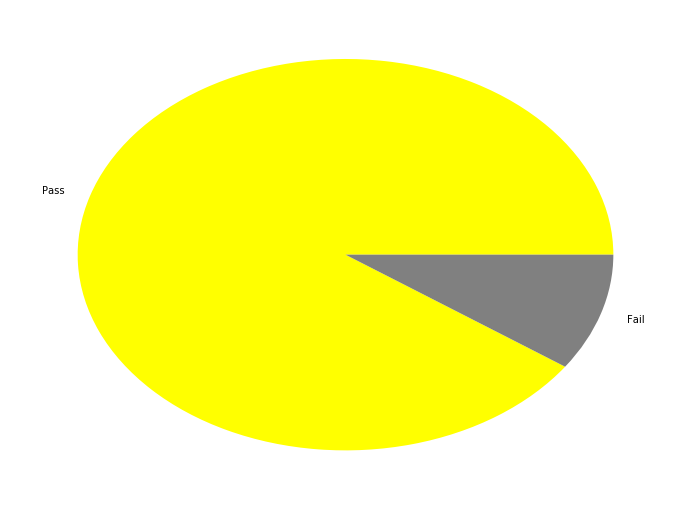

In [36]:
plt.figure(figsize=[12,9])
plt.pie(x= df['reading pass'].value_counts(), labels = ['Pass','Fail'],colors=['yellow','grey'])

#### Writing Passes

In [37]:
df['writing pass'].value_counts()

1    876
0    124
Name: writing pass, dtype: int64

([<matplotlib.patches.Wedge at 0x198bec8c788>,
 [Text(-1.01758,0.417757,'Pass'), Text(1.01758,-0.417757,'Fail')])

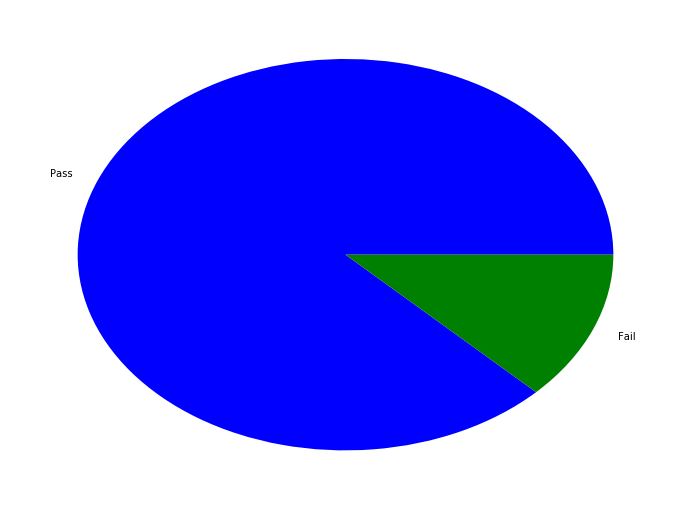

In [38]:
plt.figure(figsize=[12,9])
plt.pie(x= df['writing pass'].value_counts(), labels = ['Pass','Fail'], colors=['blue','green'] )

#### Overall Passes

In [39]:
df['overall pass'].value_counts()

1    796
0    204
Name: overall pass, dtype: int64

([<matplotlib.patches.Wedge at 0x198beea8288>,
 [Text(-0.881724,0.657695,'Pass'), Text(0.881724,-0.657695,'Fail')])

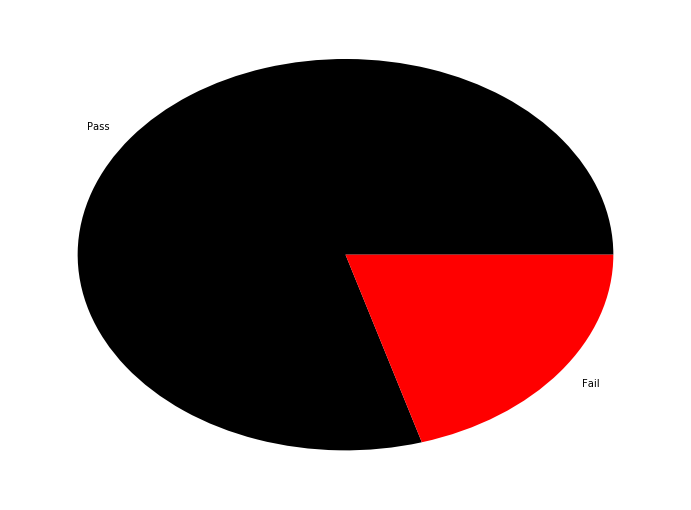

In [40]:
plt.figure(figsize=[12,9])
plt.pie(x= df['overall pass'].value_counts(), labels = ['Pass','Fail'], colors=['black','red'])

Only a 20% of the students did not pass the overall score required. 

#### Overall Passes Composition

#### Parental level of education and Overall Pass - Count

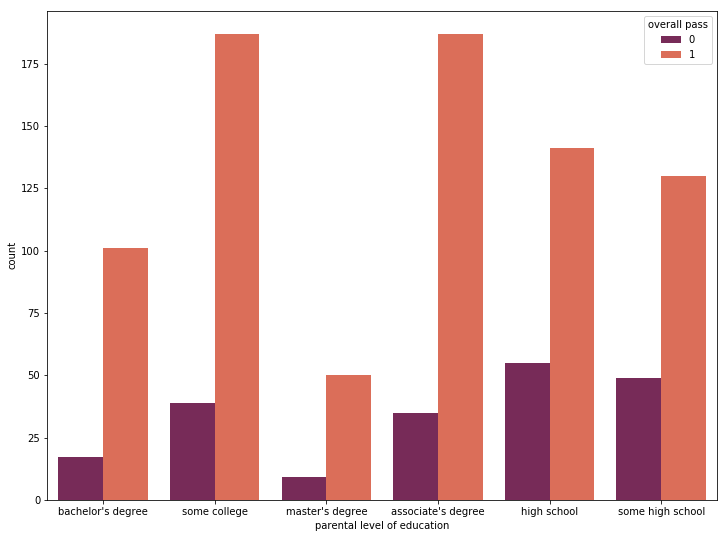

In [41]:
plt.figure(figsize=[12,9])
sns.countplot(x='parental level of education',hue='overall pass',data=df,palette='rocket')

#### Parental level of education and Overall Pass - Violin Plot

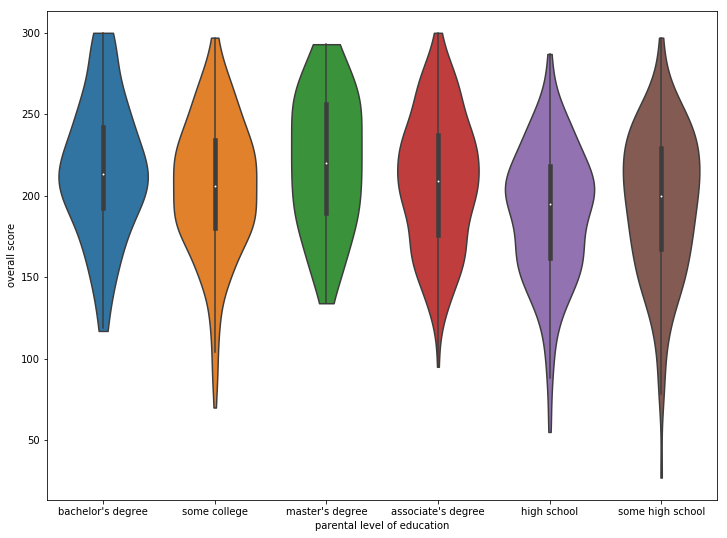

In [42]:
plt.figure(figsize=[12,9])
sns.violinplot(y='overall score', x= 'parental level of education', data=df, cut=0 )

We can see that students whose parents had a master's degree scored the highest mean scores as their low end is the highest and it's violing width is the biggest of them all closer to the top. 

On the other hand, the students whose parents had the less amount of education (in this case, some high school), had the lowest marks of all the sample. However, it's mean is higher than the mean of the student's whose parents completed high school. 

#### Race/ethnicity and Overall Pass 

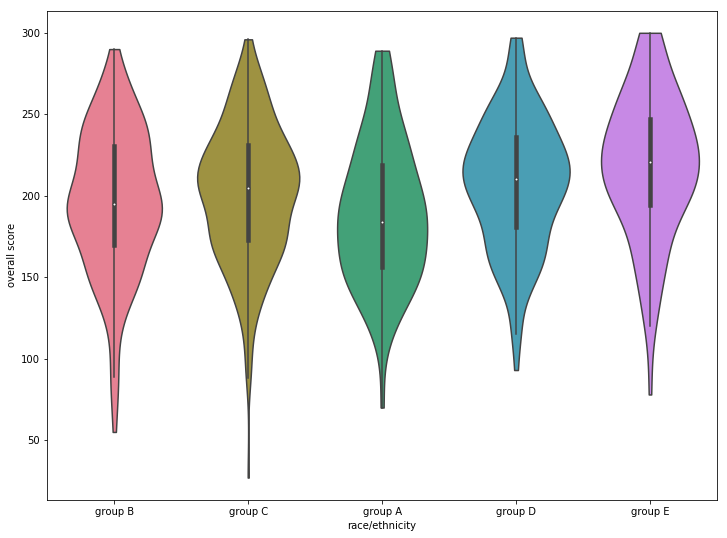

In [43]:
plt.figure(figsize=[12,9])
sns.violinplot(y='overall score', x= 'race/ethnicity', data=df, palette = 'husl', cut=0)

#### Categorical Features Encoding

In [53]:
df = pd.get_dummies(df,drop_first=True)
df.drop(['math score','reading score','writing score'],axis=1,inplace=True)

In [54]:
df.head()

,overall score,math pass,reading pass,writing pass,overall pass,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,218,1,1,1,1,0,1,0,0,0,1,0,0,0,0,1,1
1,247,1,1,1,1,0,0,1,0,0,0,0,0,1,0,1,0
2,278,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,1
3,148,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,229,1,1,1,1,1,0,1,0,0,0,0,0,1,0,1,1


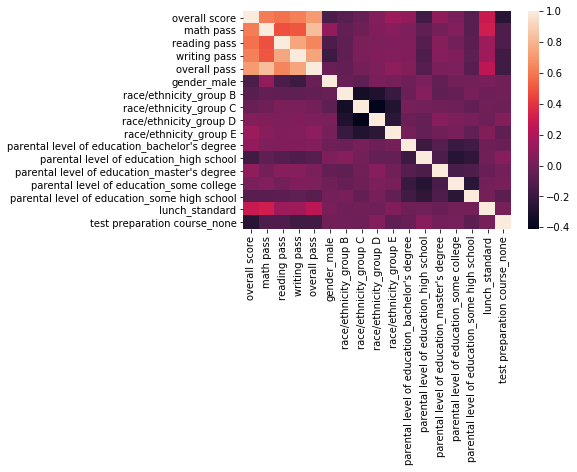

In [66]:
sns.heatmap(df.corr())

## Modelling

After getting the dataset ready, we will use a regression algorithm to predict the overall scores of the students and do a conclusion of the project. 



### Imports

In [78]:
#ML Tools 
from sklearn.model_selection import train_test_split

#ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import xgboost as xgb

#Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy import stats

#Cross Validation
from sklearn.model_selection import GridSearchCV

### Train-Test Data Split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('overall score',axis=1),df['overall score'], test_size=0.2)

### Logistic Regression

In [57]:
#Instantiate the Model
log_reg = LogisticRegression()

#Train the Model
log_reg.fit(X_train, y_train)

#Use the model to make predictions
y_pred_lr = log_reg.predict(X_test)

#Measure accuracy (R2 and RMSE)
print(mean_squared_error(y_pred_lr,y_test))
print(mean_absolute_error(y_pred_lr,y_test))
print(r2_score(y_pred_lr,y_test))

1095.18
24.97
-0.12235470463851628


### Ridge Regression

In [58]:
#Instantiate the Model
ridge_reg = Ridge()

#Train the Model
ridge_reg.fit(X_train, y_train)

#Use the model to make predictions
y_pred_ridge = ridge_reg.predict(X_test)

#Measure accuracy (R2 and RMSE)
print(mean_squared_error(y_pred_ridge,y_test))
print(mean_absolute_error(y_pred_ridge,y_test))
print(r2_score(y_pred_ridge,y_test))

677.921290649205
20.781339469512908
0.33471198794243884


### Lasso Regression

In [59]:
#Instantiate the Model
lasso_reg = Lasso()

#Train the Model
lasso_reg.fit(X_train, y_train)

#Use the model to make predictions
y_pred_lasso = lasso_reg.predict(X_test)

#Measure accuracy (R2 and RMSE)
print(mean_squared_error(y_pred_lasso,y_test))
print(mean_absolute_error(y_pred_lasso,y_test))
print(r2_score(y_pred_lasso,y_test))

697.1724991170294
20.794393224651508
0.09377458106480219


### ElasticNet Regression

In [62]:
#Instantiate the Model
elastic_reg = ElasticNet()

#Train the Model
elastic_reg.fit(X_train, y_train)

#Use the model to make predictions
y_pred_enet = elastic_reg.predict(X_test)

#Measure accuracy (R2 and RMSE)
print(mean_squared_error(y_pred_enet,y_test))
print(mean_absolute_error(y_pred_enet,y_test))
print(r2_score(y_pred_enet,y_test))

972.4268751452161
25.28436831308224
-4.382572995881337


### Decision Tree Regressor

In [60]:
#Instantiate the Model
dt_reg = DecisionTreeRegressor()

#Train the Model
dt_reg.fit(X_train, y_train)

#Use the model to make predictions
y_pred_dt = dt_reg.predict(X_test)

#Measure accuracy (R2 and RMSE)
print(mean_squared_error(y_pred_dt,y_test))
print(mean_absolute_error(y_pred_dt,y_test))
print(r2_score(y_pred_dt,y_test))

959.8884852048691
25.01087896825397
0.15870059607157005


### Decision Tree Regression CV

In [69]:
# Creamos los parametros
dt_max_depth = [2,4,6]

dt_min_samples_split = [2,5]

dt_max_features = ['auto','sqrt']

# Creamos la Param Grid
dt_param_grid = [
    {'max_depth':dt_max_depth,
    'min_samples_split':dt_min_samples_split,
    'max_features':dt_max_features}
]

dt_grid = GridSearchCV(dt_reg, dt_param_grid, cv= 3)

dt_grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [2, 4, None],
                          'max_features': ['auto', 'sqrt'],
                          'min_samples_spl

In [70]:
dt_grid.best_score_

0.5403966177780833

In [71]:
dt_grid.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

### Random Forest Regression

In [61]:
#Instantiate the Model
rf_reg = RandomForestRegressor()

#Train the Model
rf_reg.fit(X_train, y_train)

#Use the model to make predictions
y_pred_rf = rf_reg.predict(X_test)

#Measure accuracy (R2 and RMSE)
print(mean_squared_error(y_pred_rf,y_test))
print(mean_absolute_error(y_pred_rf,y_test))
print(r2_score(y_pred_rf,y_test))

851.1800835331009
23.36545964153543
0.20771155777067063


### Random Forest Regression CV - Round 1

In [72]:
# Creamos los parametros
rf_n_estimators = np.arange(10,100)

rf_max_depth = [2,4]

rf_min_samples_split = [2,5]

rf_max_features = ['auto','sqrt']

rf_bootstrap = [True,False]

# Creamos nuestra Param_grid
rf_param_grid = [
    {'n_estimators':rf_n_estimators,
    'max_depth':rf_max_depth,
    'min_samples_split':rf_min_samples_split,
    'max_features':rf_max_features,
    'bootstrap':rf_bootstrap}
]

# Fitteamos
rf_grid = GridSearchCV(estimator = rf_reg,param_grid = rf_param_grid, cv=3)

rf_grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...
                          'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
    

In [73]:
rf_grid.best_score_

0.5774966535259503

In [74]:
rf_grid.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=17, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Random Forest Regression CV - Round 2

In [85]:
# Creamos los parametros
rf_n_estimators = np.arange(10,100)

rf_max_depth = [4,6]

rf_min_samples_split = [0.5,2,3]

rf_max_features = ['auto','sqrt']

rf_bootstrap = [True,False]

# Creamos nuestra Param_grid
rf_param_grid = [
    {'n_estimators':rf_n_estimators,
    'max_depth':rf_max_depth,
    'min_samples_split':rf_min_samples_split,
    'max_features':rf_max_features,
    'bootstrap':rf_bootstrap}
]

# Fitteamos
rf_grid = GridSearchCV(estimator = rf_reg,param_grid = rf_param_grid, cv=3)

rf_grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...
                          'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
    

In [86]:
rf_grid.best_score_

0.5834315711543487

In [87]:
rf_grid.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=95, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Gradient Boost Regression

In [79]:
#Instantiate the Model
gb_reg = GradientBoostingRegressor()

#Train the Model
gb_reg.fit(X_train, y_train)

#Use the model to make predictions
y_pred_gb = gb_reg.predict(X_test)

#Measure accuracy (R2 and RMSE)
print(mean_squared_error(y_pred_gb,y_test))
print(mean_absolute_error(y_pred_gb,y_test))
print(r2_score(y_pred_gb,y_test))

704.293226871334
20.67258690392504
0.2949620728364444


### Gradient Boosting Regression CV

In [80]:
# Creamos los parametros
gb_n_estimators = [1000,2000,3000]
gb_learning_rate = [0.001,0.05,0.1]
gb_max_depth = [4,8,16]

# Creamos la Param Grid
gb_param_grid = [
    {'n_estimators':gb_n_estimators, 
     'learning_rate':gb_learning_rate,
     'max_depth':gb_max_depth}
]

gb_grid = GridSearchCV(gb_reg, gb_param_grid, cv= 3)

gb_grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [81]:
gb_grid.best_score_

0.5710546575846748

In [82]:
gb_grid.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.001, loss='ls',
                          max_depth=4, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## Conclusion

In this case, we would keep the Random Forest Model that allows us to predict the exam results with a R2 score of 58%. 

Thank you for reading!

Please contact me if you have any questions!
Contact:
- Gmail: gonzalobrunoldis@gmail.com
- LinkedIn: https://www.linkedin.com/in/gonzalobrunoldi/